# <b>Task</b>

1. Replicate the Steps: Use the techniques and steps demonstrated in the "Data Understanding & EDA" Python notebook that was covered in this week's video lessons.
2. Explore and Analyze: Apply the same exploratory data analysis procedures to this new dataset. Focus on understanding the composition of the data, checking for missing values, exploring the distribution of key variables, and any potential correlations between features.

Document Your Findings: Prepare a short report summarizing your findings, including any interesting insights you've uncovered about the data. Highlight how these might influence the outcome of a marketing campaign.
Submission: Please upload your completed notebook and summary report to the course platform by the end of the week. Ensure that your notebook is well-commented and organized to reflect the systematic approach you've taken in your analysis.

# Load Python Libraries

In [ ]:
pip install ucimlrepo

In [ ]:
pip install dython


In [ ]:
import pandas as pd
import numpy as np
import sys
import sklearn
from packaging import version
import requests
import json

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import pprint

# statistics
from dython.nominal import associations
from scipy.stats import pointbiserialr

# NETWORK ANALYSIS
import networkx as nx

# Version control
assert sys.version_info >= (3,7)
assert version.parse(sklearn.__version__)>= version.parse("1.0.1")

# <b> Data Processing Steps </b>

* Collect Initial Data
* Describe Data
* Explore Data
* Verify Data Quality


#  <b> 1. Collect Initial Data </b>

## <b>1.1 Bank Marketing </b>

The dataset is a banking dataset taken from UCI Machine Learning Repository and is located at [https://archive.ics.uci.edu/dataset/222/bank+marketing]. The data is loaded into my gloable namespace using UCI api; ucimlrepo which can be installed using pip with the command:

<code> pip install ucimlrepo </code>

This is a datasets of subscribers to a certain product from a Portuguese bank and hence the target variable will be whether a person subscribed or not.

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
input_features = bank_marketing.data.features
target_features = bank_marketing.data.targets




# <b> 2. Describe Data </b>

Where, we give a general description of the data in terms of the shape/size, i.e. the number of input entries and features.

In [ ]:
print(f" shape of the input features is: {input_features.shape} \n\n\n shape of the target features is: {target_features.shape}")

 shape of the input features is: (45211, 16) 


 shape of the target features is: (45211, 1)


The data has $45211$ entries, $16$ features and $1$ target variable. What are these features?

In [ ]:
input_features.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN


In [ ]:
target_features.head()

,y
0,no
1,no
2,no
3,no
4,no


In [ ]:
features_fields = input_features.columns.to_list()
print(f"The list of input features are: \n {features_fields}")

The list of input features are: 
 ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day_of_week', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']


In [ ]:
target_variable = target_features.columns.to_list()
print(f"target variable is: \n {target_variable}")

target variable is: 
 ['y']


The metadata on the dataset is shown below. It specifies the data type of each feature and the traget variables, the number instances and features, the goal for collecting the data, how missing values are handled, who collected the data and when it was collected

In [ ]:
data_input["day_of_week"] = data_input["day_of_week"].astype("object")
  data_input["duration"] = data_input["duration"]/60
  data_input["log_duration"] = np.log1p(data_input["duration"]/60)
  data_input["log_campaign"] = np.log1p(data_input["campaign"])
  data_input["log_previous"] = np.log1p(data_input["previous"])

  data_input["is_unemployed"] = data_input["job"].isin(["unemployed", "student", "retired"]).astype(object)
  data_input["is_married"] = (data_input["marital"] == "married").astype(object)
  data_input["day_of_week7"] = data_input["day_of_week"].apply(map_to_weekday).astype("object")
  data_input["is_weekend"] = data_input["day_of_week7"].isin([6, 7]).astype(object)
  # Map each month to its respective quarter
  month_to_quarter = {
    'jan': '1st quarter', 'feb': '1st quarter', 'mar': '1st quarter',
    'apr': '2nd quarter', 'may': '2nd quarter', 'jun': '2nd quarter',
    'jul': '3rd quarter', 'aug': '3rd quarter', 'sep': '3rd quarter',
    'oct': '4th quarter', 'nov': '4th quarter', 'dec': '4th quarter'
  }

  data_input['quarter'] = data_input['month'].map(month_to_quarter)
  bins = [0, 20, 30, 45, 60, np.inf]
  labels = ['<20', '20-30', '30-45', '45-60', '60+']
  data_input['age_group'] = pd.cut(data_input['age'], bins=bins, labels=labels, right=False)

  bins = [-float('inf'), -10000, -5000, 0, 20000, 40000, float('inf')]
  labels = ['Extremely Negative','Very Negative', 'Negative', 'Low', 'Medium', 'High']

  # Bin the balance values
  data_input['balance_group'] = pd.cut(data_input['balance'], bins=bins, labels=labels, right=False)

  bins = [-1, 0, 200, 400, float('inf')]
  labels = ['Bin1', 'Bin2', 'Bin3', 'Bin4']
  # Bin the balance values
  data_input['pdays_group'] = pd.cut(data_input['pdays'], bins=bins, labels=labels, right=False)




  # X["day_of_week"] = X["day_of_week"].astype("int")
        X["day_of_week"] = X["day_of_week"].apply(map_to_weekday).astype("object") # this is day of the month reduced to day of the week
        X["is_weekend"] = X["day_of_week"].isin([6, 7]).astype(int) # create a binary of for either weekend or not
        X["is_married"] = (X["marital"] == "married").astype(int)
        X['previously_contacted'] = (X['pdays'] != -1).astype(int) # previously contacted or not
        # X["in_debt"] = (X["balance"] < 0.).astype(int) # -ve value corresponds to someone in debt
        # Map each month to its respective quarter
        month_to_quarter = {
          'jan': '1st quarter', 'feb': '1st quarter', 'mar': '1st quarter',
          'apr': '2nd quarter', 'may': '2nd quarter', 'jun': '2nd quarter',
          'jul': '3rd quarter', 'aug': '3rd quarter', 'sep': '3rd quarter',
          'oct': '4th quarter', 'nov': '4th quarter', 'dec': '4th quarter'
        }

        X['quarter'] = X['month'].map(month_to_quarter)

        X["small_debt"] = ((X["balance"] >= -500) & (X["balance"] < 0.)).astype(int)
        X["medium_debt"] = ((X["balance"] >= -1000) & (X["balance"] < -500.) ).astype(int)
        X["high_debt"] = (X["balance"] < -1000).astype(int)
        X["middle_income"] = ((X["balance"] >= 0) & (X["balance"] < 10000.) ).astype(int)
        X["above_middle_income"] = ((X["balance"] >= 10000) ).astype(int)


In [ ]:
print(json.dumps(bank_marketing.metadata, indent=4))

{
    "uci_id": 222,
    "name": "Bank Marketing",
    "repository_url": "https://archive.ics.uci.edu/dataset/222/bank+marketing",
    "data_url": "https://archive.ics.uci.edu/static/public/222/data.csv",
    "abstract": "The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).",
    "area": "Business",
    "tasks": [
        "Classification"
    ],
    "characteristics": [
        "Multivariate"
    ],
    "num_instances": 45211,
    "num_features": 16,
    "feature_types": [
        "Categorical",
        "Integer"
    ],
    "demographics": [
        "Age",
        "Occupation",
        "Marital Status",
        "Education Level"
    ],
    "target_col": [
        "y"
    ],
    "index_col": null,
    "has_missing_values": "yes",
    "missing_values_symbol": "NaN",
    "year_of_dataset_creation": 2014,
    "last_updated": "Fri Aug 18 2023",
  

More details about the features and target can be accessed below

In [ ]:
# variable information

print(bank_marketing.variables)

           name     role         type      demographic  \
0           age  Feature      Integer              Age   
1           job  Feature  Categorical       Occupation   
2       marital  Feature  Categorical   Marital Status   
3     education  Feature  Categorical  Education Level   
4       default  Feature       Binary             None   
5       balance  Feature      Integer             None   
6       housing  Feature       Binary             None   
7          loan  Feature       Binary             None   
8       contact  Feature  Categorical             None   
9   day_of_week  Feature         Date             None   
10        month  Feature         Date             None   
11     duration  Feature      Integer             None   
12     campaign  Feature      Integer             None   
13        pdays  Feature      Integer             None   
14     previous  Feature      Integer             None   
15     poutcome  Feature  Categorical             None   
16            

# <b> 3. Explore Data </b>

## 3.1 Missing Data
By using the command <code>info()</code> on the dataframe, we obtain further summary of the data detailing the non-null count for each feature field and the data type. it is immediately obvious that the "job", "contact", "education" and "poutcome". There was no missing value for the target field.

An even better way to obtain the missing data info is using <code>isna().sum()</code> method on the data as shown below. It shows the number of missing values per feature field. The "poutcome" field (i.e. the outcome of the previous marketing campaign) has more that $70\%$ of its data missing. We have to decide how whether to drop this column or filling in the missing value.

In [ ]:
input_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


In [ ]:
target_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   y       45211 non-null  object
dtypes: object(1)
memory usage: 353.3+ KB


In [ ]:
input_features.isna().sum()

age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
dtype: int64

In [ ]:
target_features.isna().sum()

y    0
dtype: int64

## 3.2 Duplicates
There are no duplicates in the data

In [ ]:
input_features.duplicated().value_counts()

False    45211
Name: count, dtype: int64

## 3.3 Summary statistics

### 3.3.1 Numerical variables
 <b>Using the <code>describe()</code> method, we see that some of the distribution is the data is highly skewed with some outliers particulary in the "previous" input feature. This requires, verifying if the data entry makes sense or should be discarded. </b>

In [ ]:

cat_col = input_features.select_dtypes(include=["object"]).columns.to_list()

num_col = input_features.select_dtypes(include=["int64", "float64"]).columns.to_list()

print(f" The list of categorical fields are: {cat_col} \n\n\n The list of numerical fields are: {num_col}")

 The list of categorical fields are: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'] 


 The list of numerical fields are: ['age', 'balance', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous']


In [ ]:
len(num_col), len(cat_col)

(7, 9)

In [ ]:
input_features.select_dtypes(include=["int64", "float64"]).describe()

,age,balance,day_of_week,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


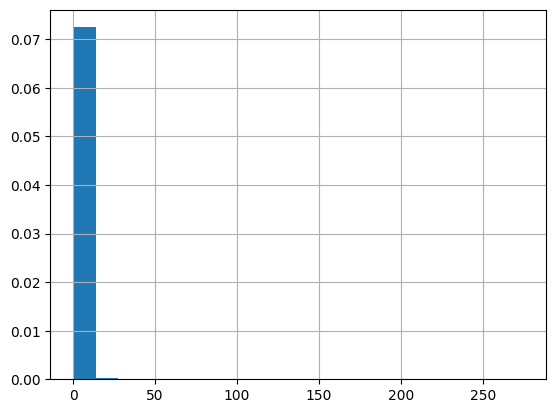

In [ ]:
plt.figure()
input_features["previous"].hist(density=True, bins=20)
plt.show()

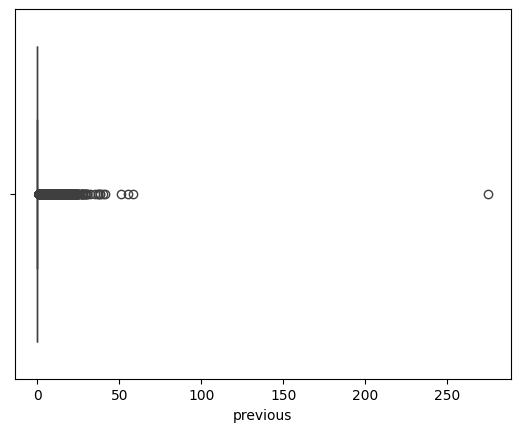

In [ ]:
# boxplot showing outliers in the dataset
#for column in ["previous"]:
sns.boxplot(x=input_features["previous"])
#plt.title(column)
plt.show()


### 3.3.2 categorical variables
 <b>Where we examine the unique variables for each field, the dominant unique variable and relative percentage of each unique variable per field. </b>

In [ ]:
# Describe only categorical variables

input_features.describe(include = [object])

,job,marital,education,default,housing,loan,contact,month,poutcome
count,44923,45211,43354,45211,45211,45211,32191,45211,8252
unique,11,3,3,2,2,2,2,12,3
top,blue-collar,married,secondary,no,yes,no,cellular,may,failure
freq,9732,27214,23202,44396,25130,37967,29285,13766,4901


 <b>The target variable is unbalanced which can lead to a bias as the number of subscribers form $11\%$ of the target class. This requires that we balance the target variable by resampling (e.g: SMOTE) or we use an appropriate metric that captures the unbalanceness. The target field has only two unique entries. </b>

In [ ]:
target_features.value_counts(normalize=True)

y  
no     0.883015
yes    0.116985
Name: proportion, dtype: float64

<b> Next, we look at the relative proportions of each the subfields for each input feature </b>

In [ ]:
input_features["job"].value_counts(normalize=True)

job
blue-collar      0.216637
management       0.210538
technician       0.169112
admin.           0.115108
services         0.092469
retired          0.050397
self-employed    0.035149
entrepreneur     0.033101
unemployed       0.029005
housemaid        0.027603
student          0.020880
Name: proportion, dtype: float64

In [ ]:
input_features["marital"].value_counts(normalize=True)

marital
married     0.601933
single      0.282896
divorced    0.115171
Name: proportion, dtype: float64

In [ ]:
input_features["education"].value_counts(normalize=True)

education
secondary    0.535176
tertiary     0.306800
primary      0.158025
Name: proportion, dtype: float64

In [ ]:
input_features["default"].value_counts(normalize=True)

default
no     0.981973
yes    0.018027
Name: proportion, dtype: float64

In [ ]:
input_features["housing"].value_counts(normalize=True)

housing
yes    0.555838
no     0.444162
Name: proportion, dtype: float64

In [ ]:
input_features["loan"].value_counts(normalize=True)

loan
no     0.839774
yes    0.160226
Name: proportion, dtype: float64

In [ ]:
input_features["contact"].value_counts(normalize=True)

contact
cellular     0.909726
telephone    0.090274
Name: proportion, dtype: float64

In [ ]:
input_features["month"].value_counts(normalize=True)

month
may    0.304483
jul    0.152507
aug    0.138174
jun    0.118135
nov    0.087810
apr    0.064851
feb    0.058592
jan    0.031032
oct    0.016323
sep    0.012807
mar    0.010551
dec    0.004733
Name: proportion, dtype: float64

In [ ]:
input_features["poutcome"].value_counts(normalize=True)

poutcome
failure    0.593917
other      0.222976
success    0.183107
Name: proportion, dtype: float64

### 3.4 Data Visualization and Correlation

In [ ]:
# conmbine all the data
all_features = pd.concat([input_features, target_features], axis = 1)
all_features.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day_of_week', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
all_features.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


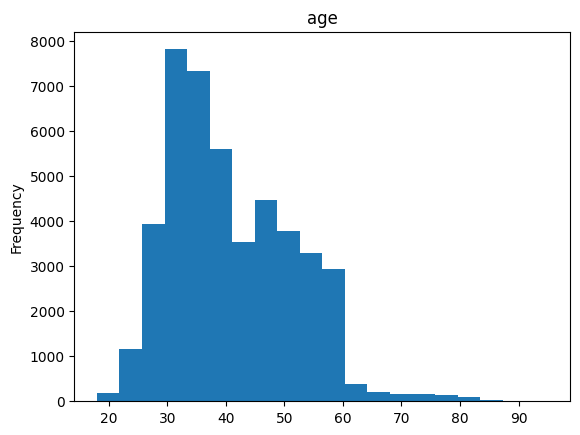

In [ ]:
input_features['age'].plot(kind='hist', bins=20, title='age')
plt.show()

To prevent multi-collinearity, we check to see the correlation between the input features. I found a weak correlation between the numerical input features themselves. A pairplot is made to show how the various input features correlate with each other and it can clearly be seen that there is very weak correlation between the input features

Next we explore how informative these input features are towards our data science goal (classification in this case). To do this, the categorical target or response variable is one-hot encoded and the correlation between these new encoded variable and the numerical input features calculated as shown below. The most informative feature judging from the plot below is the "pdays".



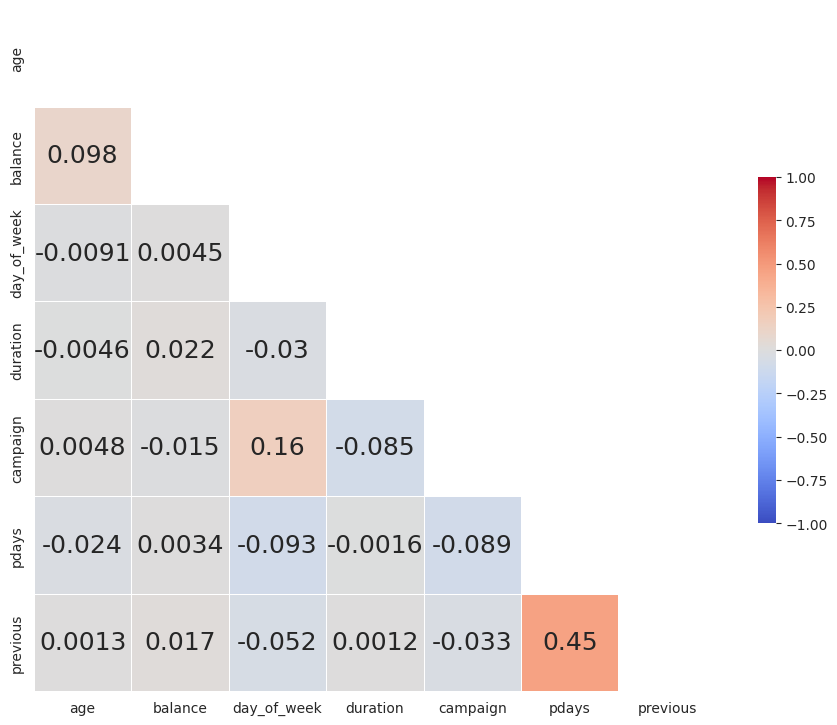

In [ ]:
corr = input_features.select_dtypes(include=["int64", "float64"]).corr()
with sns.axes_style("white"):
    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(
        corr,
        mask=mask,
        vmin=-1,
        vmax=1,
        center=0,
        square=True,
        annot=True,
        annot_kws={"size": 18},
        linewidths=0.5,
        cmap='coolwarm',
        cbar_kws={"shrink": 0.5},
    )

Combining the target and response features into a single dataframe in order to compute the correlation bwtween the input features and the traget varibale.

In [ ]:
# all_features = pd.get_dummies(all_features, columns=['y'], drop_first=True)
all_features['new_y'] = all_features['y'].apply(lambda x: 1 if x == 'yes' else 0)
all_features.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y,new_y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no,0
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no,0
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no,0
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no,0


In [ ]:
numerical_features = all_features.select_dtypes(include = ['int64', 'float64'])
numerical_features.columns

Index(['age', 'balance', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'new_y'],
      dtype='object')

In [ ]:
# Calculate point-biserial correlation and store the results
correlation_results = {}
for column in numerical_features.columns[0:-1]:  # Skip the binary categorical column
    corr, _ = pointbiserialr(numerical_features['new_y'], numerical_features[column])
    correlation_results[column] = corr

In [ ]:
correlation_results

{'age': 0.0251550170883809,
 'balance': 0.05283841028818288,
 'day_of_week': -0.02834777672093108,
 'duration': 0.3945210158945622,
 'campaign': -0.07317200634586717,
 'pdays': 0.10362149401628598,
 'previous': 0.0932357727888776}

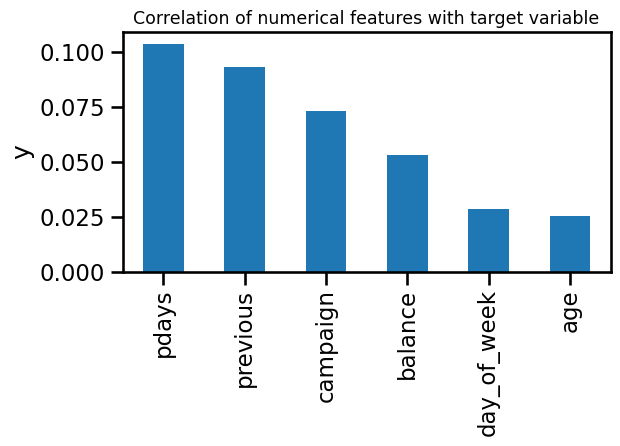

In [ ]:
correlation_matrix = pd.DataFrame([correlation_results])
correlation_matrix.iloc[0].abs().sort_values(ascending=False)[1:].plot(kind="bar")
plt.ylabel('y')
plt.title('Correlation of numerical features with target variable', fontsize='x-small')
plt.tight_layout()
plt.show()

### Correlations involving different data types

Here, I used <code>dython</code> library to calcullate the correlation between numerical variables, cramer V for the association between categorical variable and finally correlation ratio for the relationship between a numerical and categorical variable

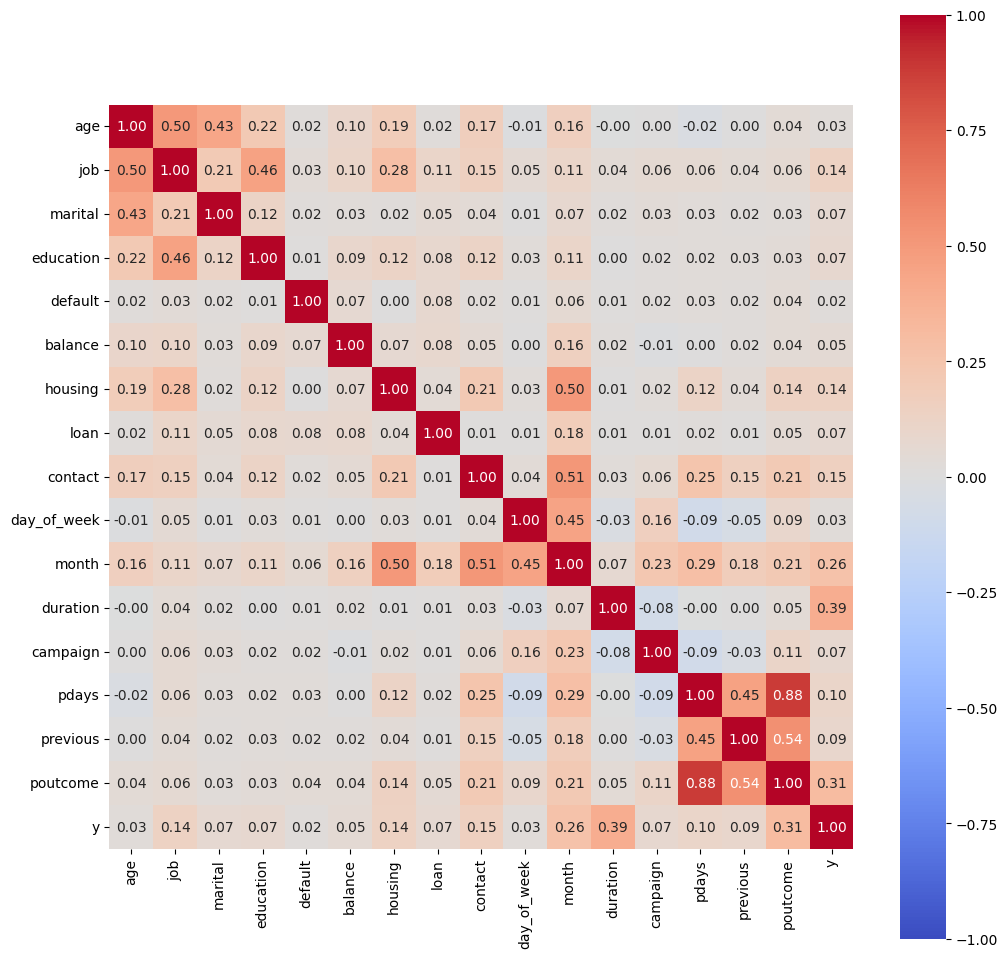

In [ ]:

assoc = associations(all_features, nominal_columns= cat_col, numerical_columns=num_col, nom_nom_assoc="cramer", num_num_assoc="pearson", nom_num_assoc="correlation_ratio", plot=True, cmap = "coolwarm", figsize = (12, 12))


Let's checkout the how informative the various features are by looking at the correlaton plot below. Judging

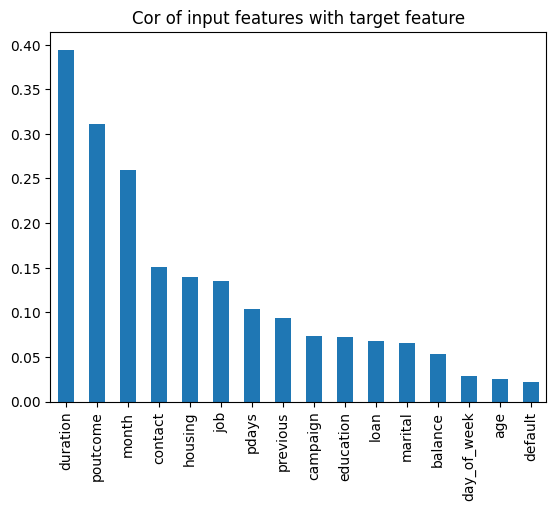

In [ ]:
assoc["corr"].loc["y", :].drop("y").sort_values(ascending=False).plot(kind="bar")
plt.title("Cor of input features with target feature")
plt.show()

Another way of showing the relationship between the various features is by using a pairplot as done below.

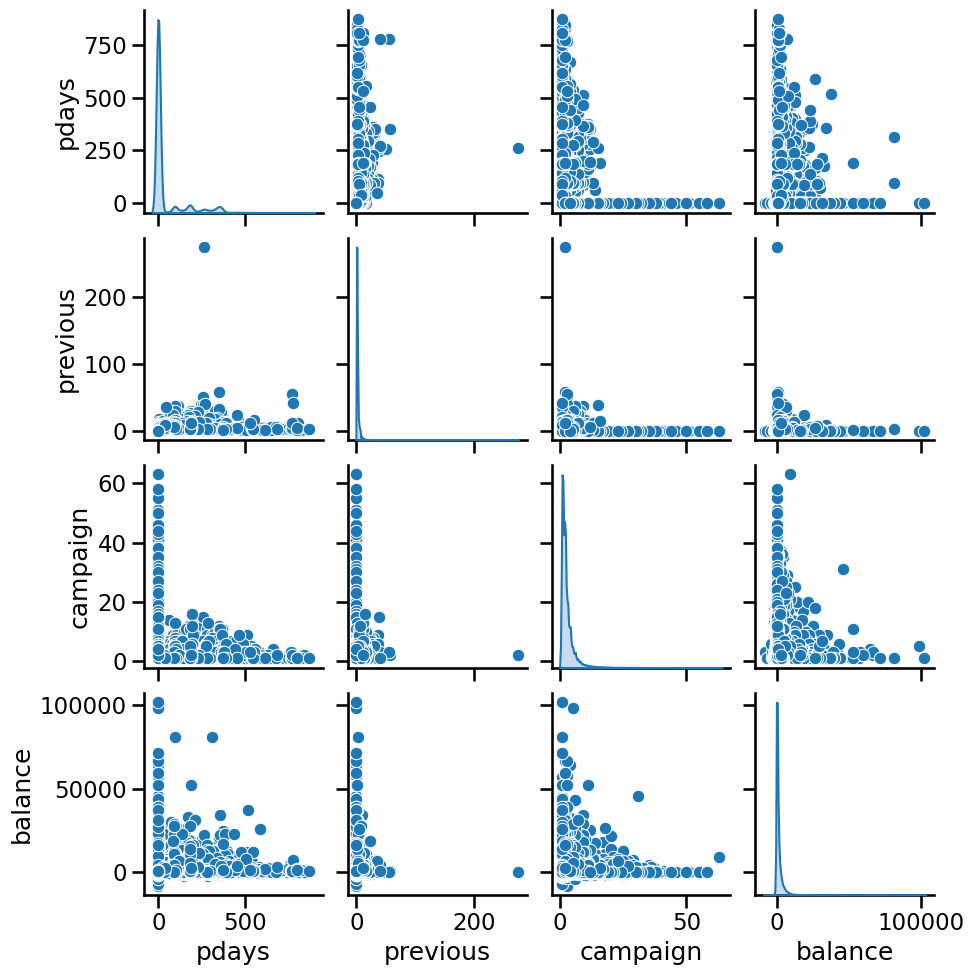

In [ ]:
sns.set_context("talk")

sns.pairplot(input_features.select_dtypes(include=["int64", "float64"]).loc[:, ["pdays", "previous", "campaign", "balance"]], diag_kind= 'kde')

plt.show()

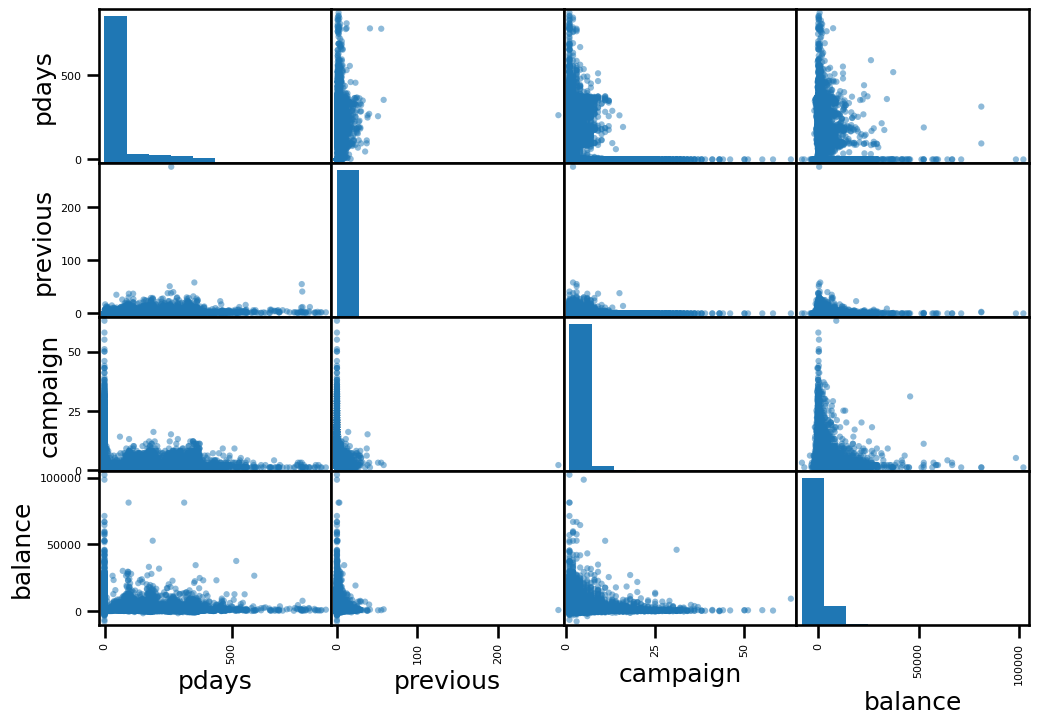

In [ ]:
from pandas.plotting import scatter_matrix

scatter_matrix(input_features.select_dtypes(include=["int64", "float64"]).loc[:, ["pdays", "previous", "campaign", "balance"]], figsize=(12, 8))
plt.show()

# Advance Explorations
If for instance, I want to understand the relation between people who took loan ans their level education, I can use the graph below. People with primary and secondary education has the least loans and most loans respectively

In [ ]:
combi_education_loan = input_features.loc[:,['education', 'loan']].dropna().groupby(['education', 'loan']).size().reset_index(name='weight')
combi_education_loan

,education,loan,weight
0,primary,no,5827
1,primary,yes,1024
2,secondary,no,18899
3,secondary,yes,4303
4,tertiary,no,11517
5,tertiary,yes,1784


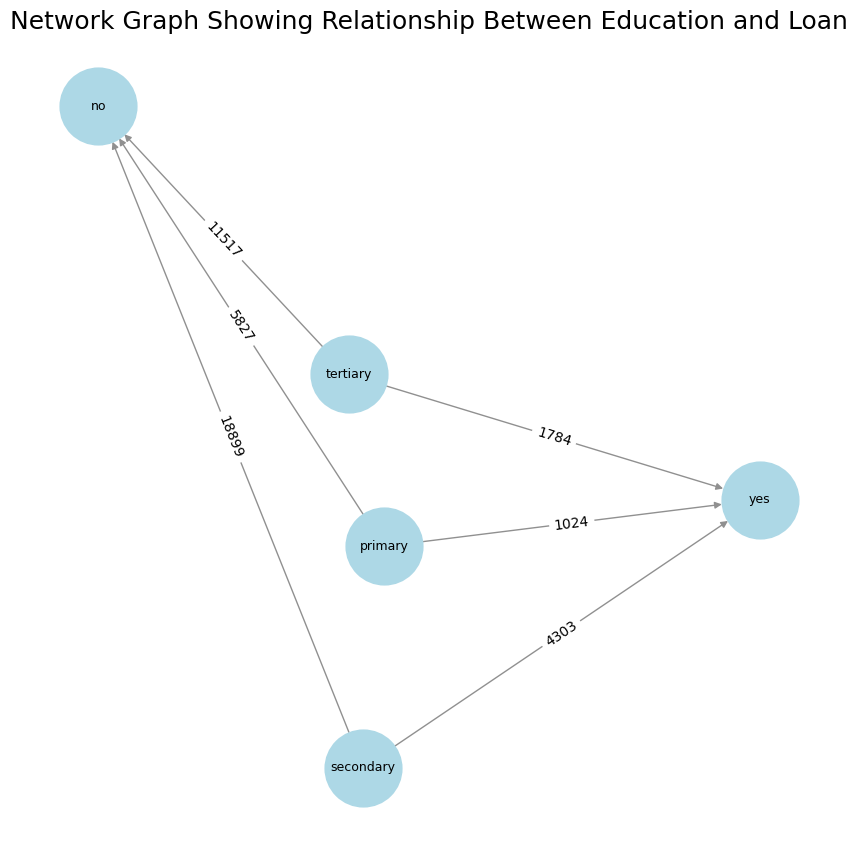

In [ ]:
#combi_education_loan_top1000 = combi_education_loan.sort_values(by='weight', ascending=False).head(1000)

# Creating a directed graph
G = nx.DiGraph()

# Add edges from the unique Combination of 'education', 'occupation'
for _, row in combi_education_loan.iterrows():
    G.add_edge(row['education'], row['loan'], weight=row['weight'])

# Position nodes using the spring layout
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(G, k=.8, iterations=10)

# Draw nodes, edges, and labels
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='#909090', node_size=3000, font_size=9)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

# Display the graph
plt.title('Network Graph Showing Relationship Between Education and Loan')
#plt.axis('off')  # Hide the axes
plt.show()

# Summary Report

The data to consist of both numuric and categorical types. It has some missing data particularly for the "poutcome" input feature column where more than $60\%$ of the data missing. There also some outliers which requires handling. There are no duplicates in the data. The response or target variable is unbalance with a ratio of $1:9$. After encoding the categorical target variable, I found the highest correlated input feature to be "pdays" with a correlation value of $0.1$ which is still a weak correlation. This means none of the features are informative and hence requires some feature engineering to introduce new features that will increase the predictive power of our model.